# Photographers at the V&A
## Data Exploration #5


To look at the photographers held in the V&A collections, we need to query object types of "photograph" and "photographs" (due to variations in cataloguing) and cluster the results by 'maker'.

We show a treemap visualisation of the top 50 results for each, and then CSV exports of the top 100 (max allowed at present). We also generate a sample of photographers as a PDF to provide a printable reference.


The following code (click to expand) setups the treemap drawing

In [4]:
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name):
    
  clusters_json = [{"id": index+1, "name": [x["value"], "%d objects" % x["count"]], "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

## Data Visualisation

Now we query the API for the object types and show them as a treemap

### Photograph

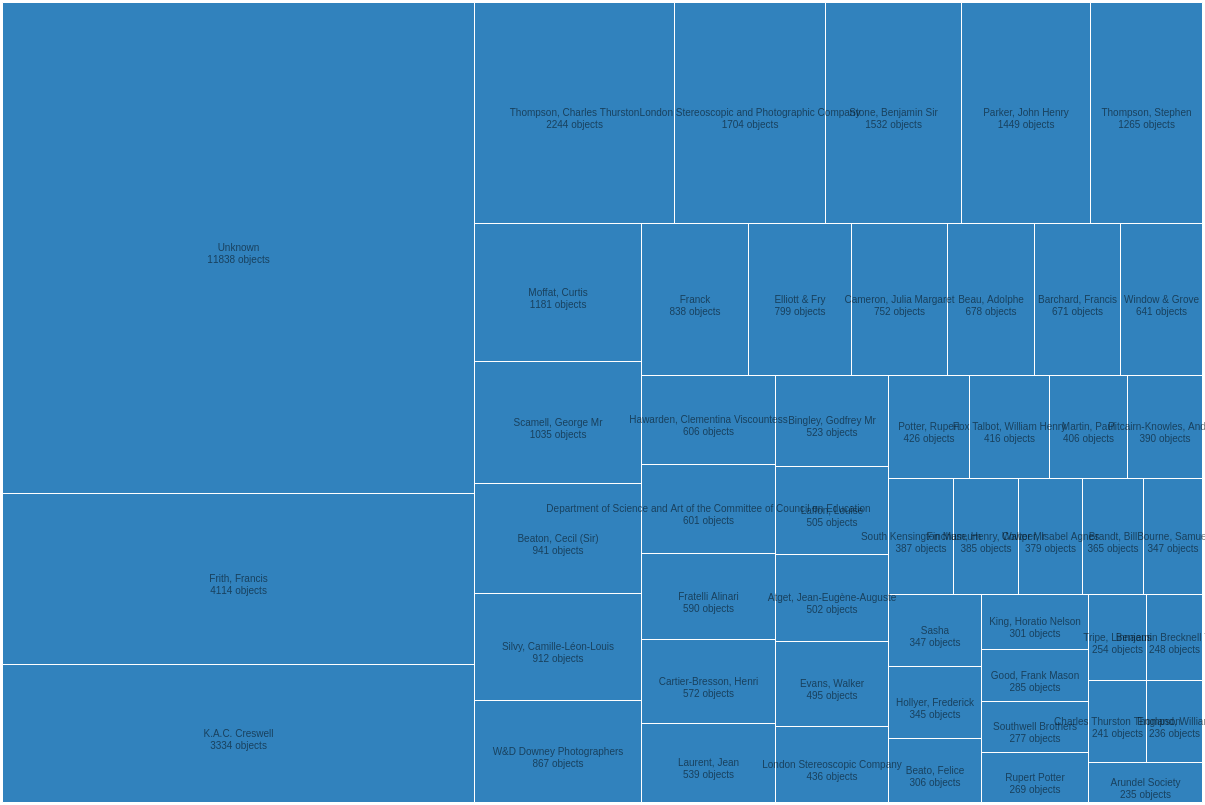

In [5]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photograph&cluster_size=50')
treemap(req.json(), "Photographers")

### Photographs

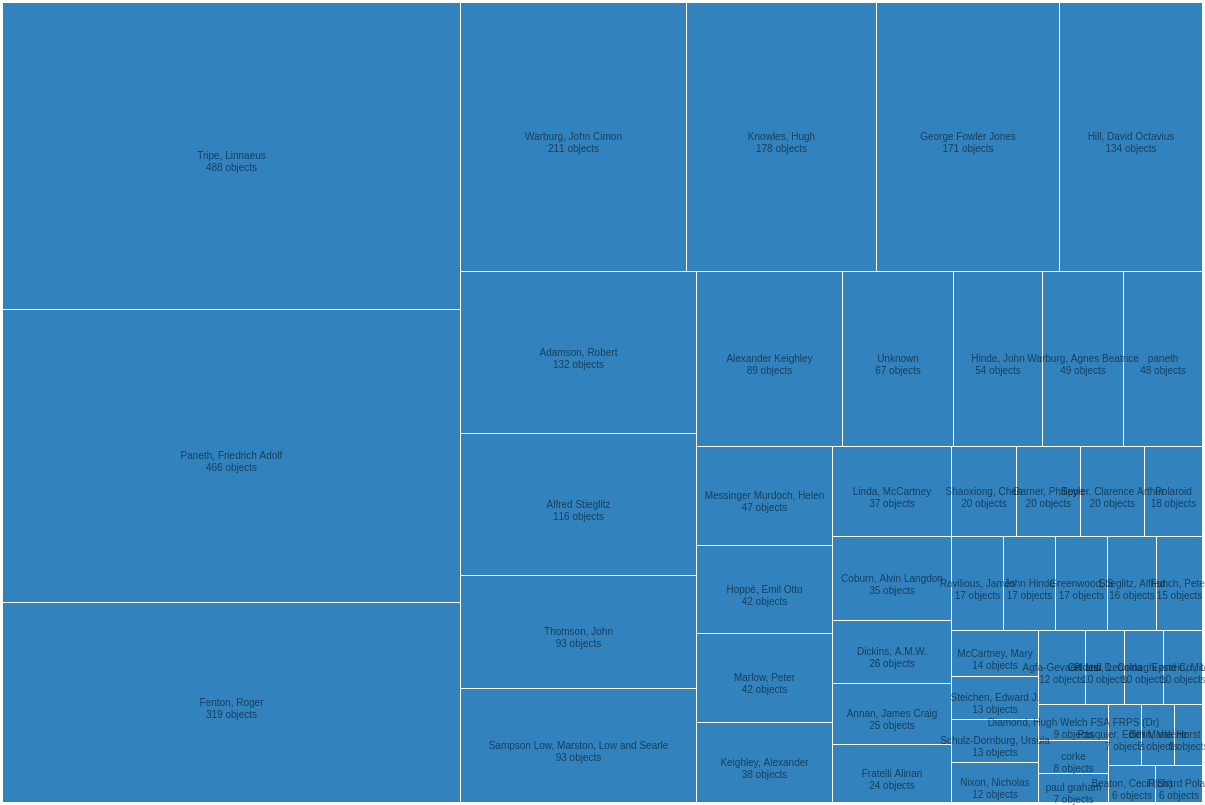

In [6]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photographs&cluster_size=50')
treemap(req.json(), "Photographer")

## Saving as CSV

AT present we do not have a custom CSV response for cluster endpoints, this is something that might be added in a future version of the API

In [18]:
import pandas as pd
df_photograph = pd.read_json('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photograph&cluster_size=100', orient='records')
df_photograph.to_csv("photograph-top-100.csv")
df_photograph.head(10)

,id,value,count,count_max_error
0,A1848,Unknown,11838,0
1,A6403,"Frith, Francis",4114,0
2,AUTH334543,K.A.C. Creswell,3334,0
3,N3687,"Thompson, Charles Thurston",2244,0
4,A5970,London Stereoscopic and Photographic Company,1704,0
5,A4801,"Stone, Benjamin Sir",1532,0
6,AUTH325233,"Parker, John Henry",1449,0
7,AUTH335751,"Thompson, Stephen",1265,0
8,A12876,"Moffat, Curtis",1181,0
9,A4798,"Scamell, George Mr",1035,0


In [19]:

import pandas as pd
df_photographs = pd.read_json('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=photographs&cluster_size=100', orient='records')
df_photographs.to_csv("photographs-top-100.csv")

In [3]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photograph&cluster_size=50')
top100_photographers = req.json()


## Generating PDF sample

A possibly useful way to look at the data, for those who don't want to just see spreadsheets and data tables, is to construct a PDF with a sample of objects for each photograph. This (drawn from reportlab documentation) code generate a very simple PDF with images of 5 objects for the first 10 photographers.

In [14]:
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.rl_config import defaultPageSize
from reportlab.lib.units import inch
import PIL
from io import BytesIO
import requests
import pandas as pd

PAGE_HEIGHT=defaultPageSize[1]; 
PAGE_WIDTH=defaultPageSize[0]
styles = getSampleStyleSheet()
top100_photographs = ""

Title = "V&A Photographers - Top 10"
pageinfo = "vam-api-data-exploration-5"

def myFirstPage(canvas, doc): 
    canvas.saveState() 
    canvas.setFont('Times-Bold',16)  
    canvas.drawCentredString(PAGE_WIDTH/2.0, PAGE_HEIGHT-108, Title) 
    canvas.setFont('Times-Roman',9) 
    canvas.drawString(inch, 0.75 * inch, "First Page / %s" % pageinfo) 
    canvas.restoreState()

def myLaterPages(canvas, doc): 
    canvas.saveState()  
    canvas.setFont('Times-Roman',9)   
    canvas.drawString(inch, 0.75 * inch, "Page %d %s" % (doc.page, pageinfo)) 
    canvas.restoreState()

chart_style = TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER')])

def build_doc():  
    doc = SimpleDocTemplate("photographers-samples.pdf") 
    Story = [Spacer(1,2*inch)]  
    style = styles["Normal"]  
    
    i = 0
    for photographer in top100_photographers:
        photographer_name = photographer['value']   
        photographer_id = photographer['id']
        
        p = Paragraph(photographer_name, style)     
        Story.append(p)   
        Story.append(Spacer(1,0.4*inch)) 
        
        # Retrieve an image to show, update URL to point directly to thumbnail derivative
        query_url = "https://api.vam.ac.uk/v2/objects/search?id_maker=%s&images_exist=1&response_format=csv&page_size=20" % photographer_id
        photograph_objects = pd.read_csv(query_url)
        IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
        photograph_objects._primaryImageId = [IIIF_IMAGE_URL % item for item in photograph_objects._primaryImageId]      

        r = requests.get(photograph_objects.iloc[0]._primaryImageId)
        image1 = Image(BytesIO(r.content), width=inch, height=inch)
        if(photograph_objects.iloc[0]._primaryTitle != "nan"):
          object_link = Paragraph('<link href="https://collections.vam.ac.uk/item/%s">%s</link>' % (photograph_objects.iloc[0].systemNumber, photograph_objects.iloc[0]._primaryTitle))
        else:
          object_link = Paragraph('<link href="https://collections.vam.ac.uk/item/%s">%s</link>' % (photograph_objects.iloc[0].systemNumber, photograph_objects.iloc[0].objectType))
        
        r = requests.get(photograph_objects.iloc[1]._primaryImageId)
        image2 = Image(BytesIO(r.content), width=inch, height=inch)
        
        r = requests.get(photograph_objects.iloc[2]._primaryImageId)
        image3 = Image(BytesIO(r.content), width=inch, height=inch)
        
        r = requests.get(photograph_objects.iloc[3]._primaryImageId)
        image4 = Image(BytesIO(r.content), width=inch, height=inch)
        
        r = requests.get(photograph_objects.iloc[4]._primaryImageId)
        image5 = Image(BytesIO(r.content), width=inch, height=inch)
        
        Story.append(Table([[image1, image2, image3, image4, image5], [object_link, object_link, object_link, object_link, object_link]],
                     colWidths=[inch, inch, inch, inch, inch],
                     rowHeights=[ 0.75*inch, 0.25*inch], style=chart_style))
        
        Story.append(Spacer(1,0.2*inch)) 
        if i > 9:
            break
        else:
            i += 1
      
    doc.build(Story, onFirstPage=myFirstPage, onLaterPages=myLaterPages)
 
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photograph&cluster_size=50')
top100_photographers = req.json()

build_doc()
    
